В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
!wget https://raw.githubusercontent.com/trimm-trabb/PythonML/main/process_bank_churn.py
!pip install opendatasets --upgrade --quiet

--2024-07-09 18:30:47--  https://raw.githubusercontent.com/trimm-trabb/PythonML/main/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5801 (5.7K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]   5.67K  --.-KB/s    in 0s      

2024-07-09 18:30:47 (54.5 MB/s) - ‘process_bank_churn.py’ saved [5801/5801]



In [30]:
from process_bank_churn import preprocess_data, preprocess_new_data
import opendatasets as od
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [3]:
pd.options.display.max_columns = None

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/data?select=train.csv'
od.download(dataset_url)

In [39]:
data_dir = './bank-customer-churn-prediction-dlu'
train_csv = data_dir + '/train.csv'
test_csv =  data_dir + '/test.csv'
sample_submission_csv =  data_dir + '/sample_submission.csv'

In [8]:
raw_df = pd.read_csv(train_csv)
datasets, input_cols, scaler, encoder = preprocess_data(raw_df)
train_X = datasets['train_X']
train_y = datasets['train_y']
val_X = datasets['val_X']
val_y = datasets['val_y']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [9]:
def compute_auroc(model, inputs, targets):
  y_pred_proba = model.predict_proba(inputs)[:, 1]
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)
  roc_auc = auc(fpr, tpr)

  return fpr, tpr, roc_auc

def compute_auroc_and_build_roc(model, inputs, targets, name=''):
  fpr, tpr, roc_auc = compute_auroc(model, inputs, targets)
  print(f'AUROC for {name}: {roc_auc}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

In [10]:
model = DecisionTreeClassifier(random_state=42)
model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

AUROC for Train: 1.0


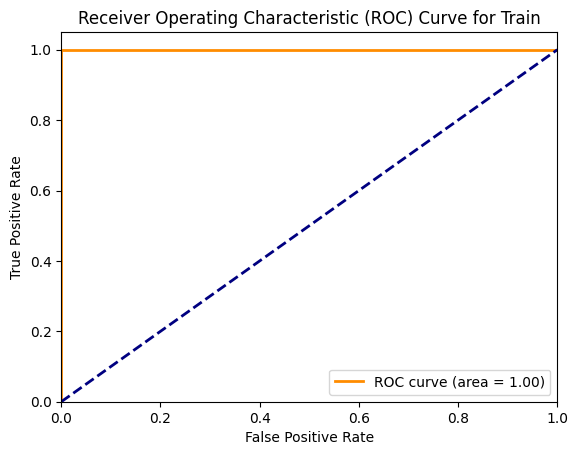

AUROC for Validation: 0.7699533575691063


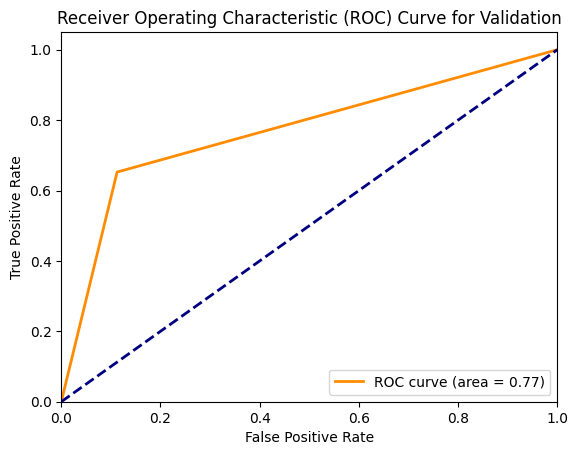

In [11]:
compute_auroc_and_build_roc(model, train_X, train_y, name='Train')
compute_auroc_and_build_roc(model, val_X, val_y, name='Validation')

Модель є очевидно перенавченою, вона видає ідеальні передбачення на трейн даних, але погано генералізує і перформить на даних, яких вона не бачила.

Перевіримо глибину створеного дерева.

In [12]:
model.tree_.max_depth

26

Побудуємо дерево до глибини 2 включно:

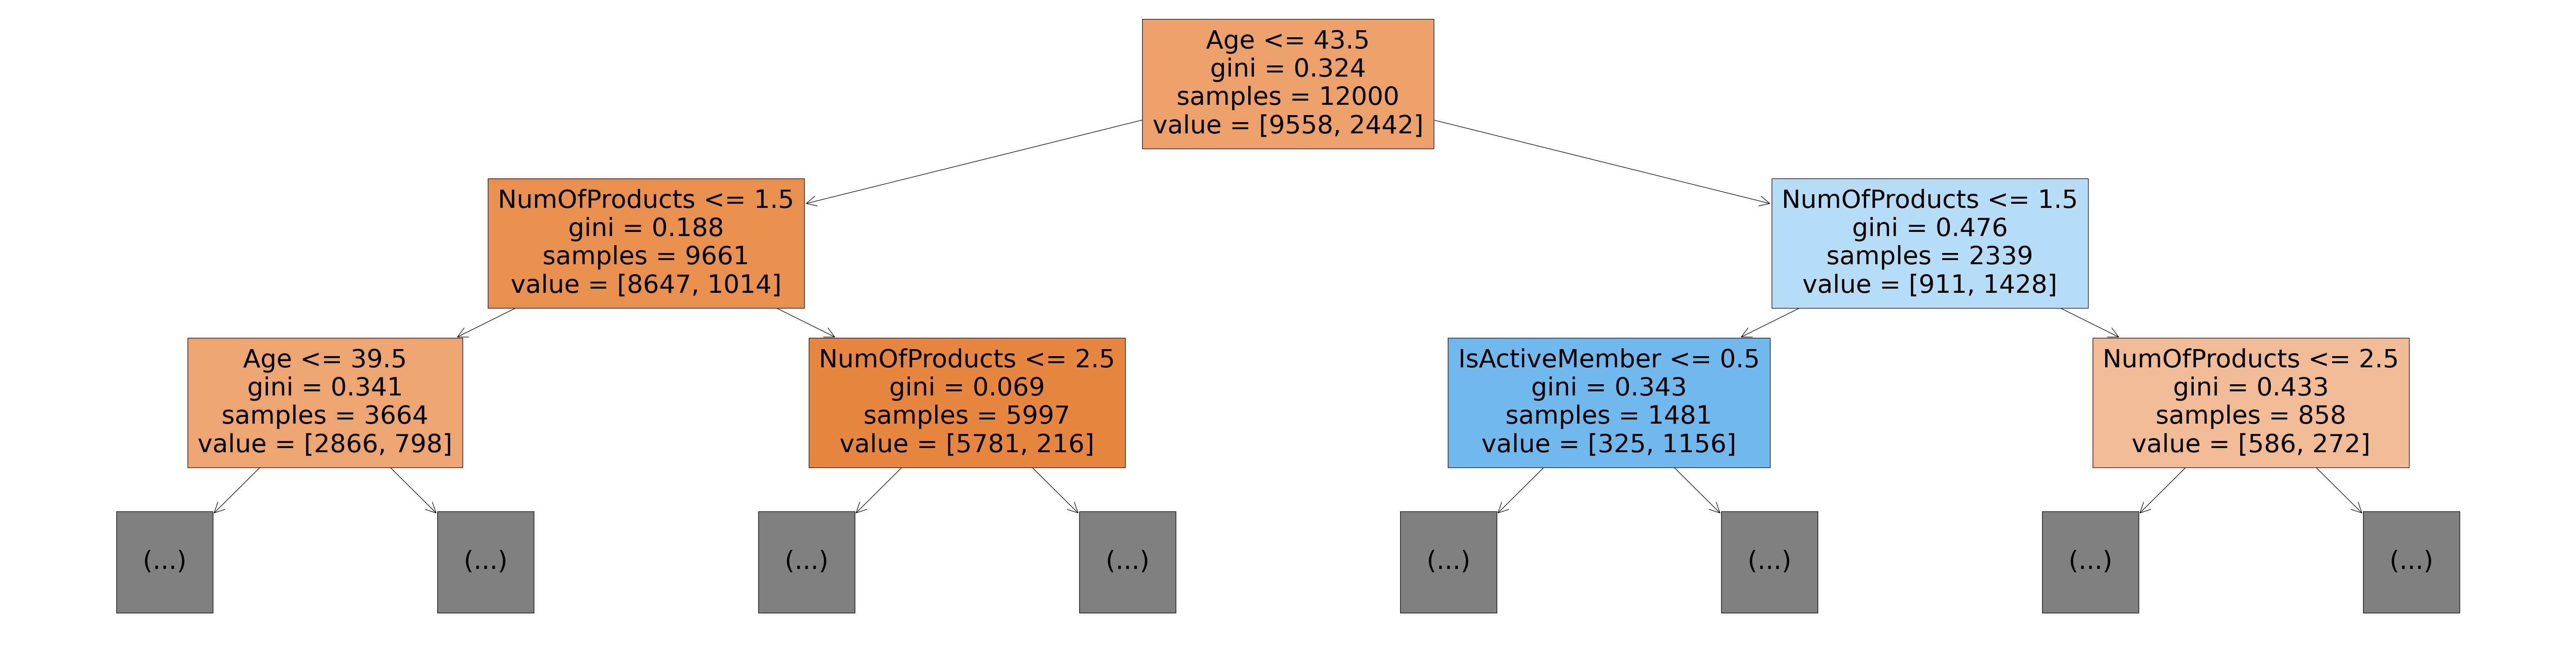

In [34]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_X.columns, max_depth=2, filled=True);

Бачимо, що найвпливовішими ознаками є Age, NumOfProducts.

Виведемо 10 найвпливовіших ознак моделі:

In [35]:
importance_df = pd.DataFrame({
    'feature': train_X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
1,Age,0.543686
4,NumOfProducts,0.300476
6,IsActiveMember,0.055297
3,Balance,0.049758
9,Geography_Germany,0.021904
11,Gender_Female,0.011092
0,CreditScore,0.009013
12,Gender_Male,0.005785
2,Tenure,0.001572
7,EstimatedSalary,0.001417


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

AUROC for Train: 0.93047807266263


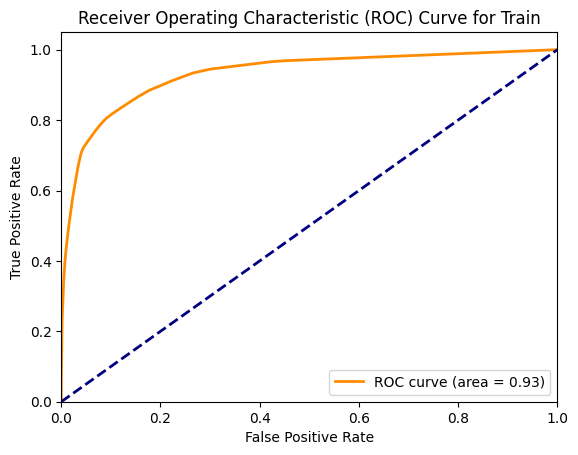

AUROC for Validation: 0.9247997119143974


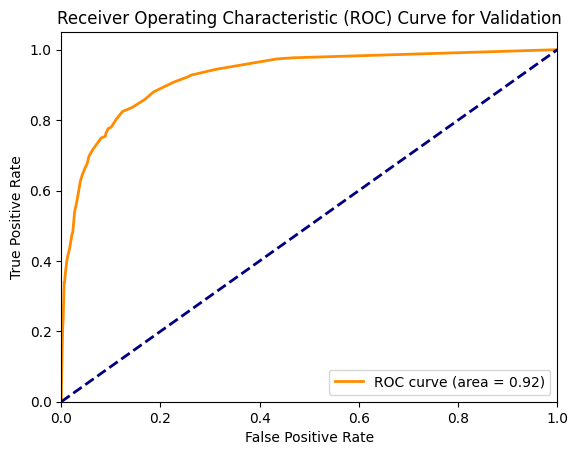

In [17]:
experimental_model = DecisionTreeClassifier(random_state=42, max_depth=8, max_leaf_nodes=45)
experimental_model.fit(train_X, train_y)
compute_auroc_and_build_roc(experimental_model, train_X, train_y, name='Train')
compute_auroc_and_build_roc(experimental_model, val_X, val_y, name='Validation')

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [36]:
max_depth_list = np.arange(1, 21, 1)
auroc_dict_train = {}
auroc_dict_val = {}

# train the model of each depth and compute auroc
for max_depth in max_depth_list:
  model = DecisionTreeClassifier(max_depth=max_depth, random_state=42).fit(train_X, train_y)
  auroc_dict_train[max_depth] = compute_auroc(model, train_X, train_y)[2]
  auroc_dict_val[max_depth] = compute_auroc(model, val_X, val_y)[2]

# find the max depth with the highest validation auroc
best_max_depth = max(auroc_dict_val, key=auroc_dict_val.get)
best_auroc_val = auroc_dict_val[best_max_depth]

best_max_depth, best_auroc_val

(5, 0.9219267439467729)

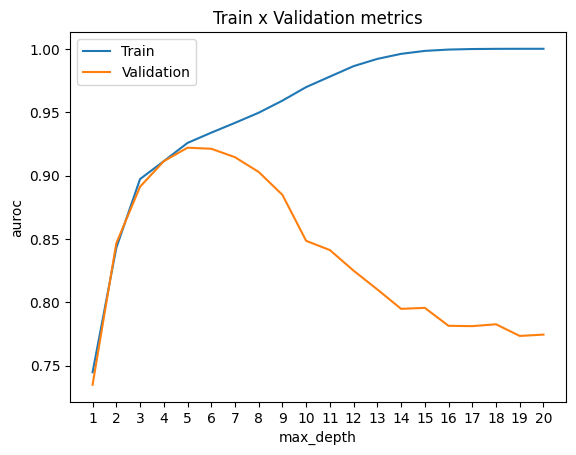

In [20]:
# plot auroc vs max depth for train and validation datasets
plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('auroc')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(auroc_dict_train.values())
plt.plot(auroc_dict_val.values())
plt.legend(['Train','Validation'])

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


Оскільки модель обрана "методом тика" :) видає трохи кращий auroc ніж модель в завданні 4 з дефолтним значенням max_leaf_nodes, я би спробувала пошукати ще краще поєднання цих двох параметрів з використанням циклів:

In [38]:
max_depth_list = np.arange(5, 11, 1)
max_leaf_nodes_list = np.arange(20, 51, 1)
auroc_dict_train = {}
auroc_dict_val = {}

# train the model for each combination of max depth and max leaf nodes, and compute auroc
for max_depth in max_depth_list:
  for max_leaf_nodes in max_leaf_nodes_list:
    model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42).fit(train_X, train_y)
    auroc_dict_train[(max_depth, max_leaf_nodes)] = compute_auroc(model, train_X, train_y)[2]
    auroc_dict_val[(max_depth, max_leaf_nodes)] = compute_auroc(model, val_X, val_y)[2]

# find the best combination of max depth and max leaf nodes with the highest validation auroc
best_combination = max(auroc_dict_val, key=auroc_dict_val.get)
best_auroc_val = auroc_dict_val[best_combination]

best_combination, best_auroc_val

((8, 47), 0.9249128884011248)

Бачимо, що auroc покращився дуже мінімально (0.9249 vs 0.9219), але при цьому глибина дерева зросла з 5 до 8, якщо це не задача kaggle :D, я би обрала простішу модель.

In [40]:
model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=47, random_state=42).fit(train_X, train_y)

In [41]:
test_raw_df = pd.read_csv(test_csv)
test_X = preprocess_new_data(test_raw_df, input_cols, scaler, encoder)
probas = model.predict_proba(test_X)

In [42]:
from google.colab import drive
drive.mount('/content/drive')
dir = '/content/drive/MyDrive/Machine Learning/Data/'
os.chdir(dir)

Mounted at /content/drive


In [43]:
submission = pd.read_csv(sample_submission_csv)
submission.Exited = probas[:,1]
submission.head()
submission.to_csv('submission_decision_tree.csv', index=False)

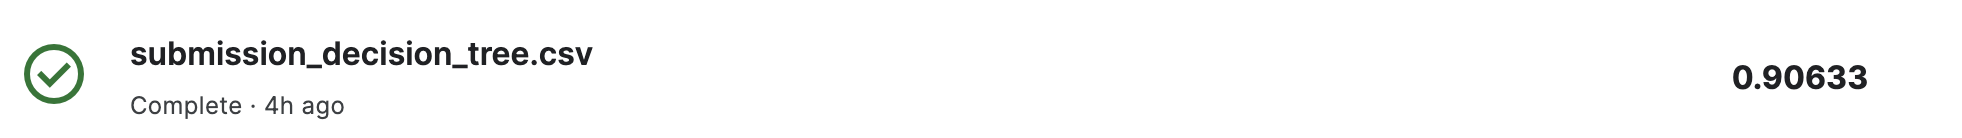